# Introduction

Heart diseases are the leading cause of death globally. Each year, 17.9 million deaths occur, that is one death every other second. One third of these deaths occur below the age of 70. A lot of effort is provided by researchers all over the world to provide prevention, help, relieve, and hopefully one day cure heart diseases. Carmat, a french company, just received approval in December 2020 to sell their artificial heart in Europe.

## The data

The dataset named "Cleveland Heart Disease Dataset" comes from a study conducted in 1988 and originates from the UCI Machine Learning Repository. The dataset was split in two: a training and a testing set. The task is to get the best predictor and guess if a patient has a heart disease.

## Features

The dataset is provided in the same format we have gotten it. Often the data needs to be cleaned and formatted, this step has already taken care of by the providers of the dataset. No column names appear in the original dataset, so you will need to add them on your own.

There are 14 columns:

* age: The age of the patient.
* sex: The gender of the patient. (1 = male, 0 = female).
* cp: Type of chest pain. (1 = typical angina, 2 = atypical angina, 3 = non — anginal pain, 4 = asymptotic).
* trestbps: Resting blood pressure in mmHg.
* chol: Serum Cholestero in mg/dl.
* fbs: Fasting Blood Sugar. (1 = fasting blood sugar is more than 120mg/dl, 0 = otherwise).
* restecg: Resting ElectroCardioGraphic results (0 = normal, 1 = ST-T wave abnormality, 2 = left ventricular hyperthrophy).
* thalach: Max heart rate achieved.
* exang: Exercise induced angina (1 = yes, 0 = no).
* oldpeak: ST depression induced by exercise relative to rest.
* slope: Peak exercise ST segment (1 = upsloping, 2 = flat, 3 = downsloping).
* ca: Number of major vessels (0–3) colored by flourosopy.
* thal: Thalassemia (3 = normal, 6 = fixed defect, 7 = reversible defect).
* target: Diagnosis of heart disease (0 = absence, 1, 2, 3, 4 = present).

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#  Loading Data

In [31]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Data Exploration

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [21]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<AxesSubplot:>

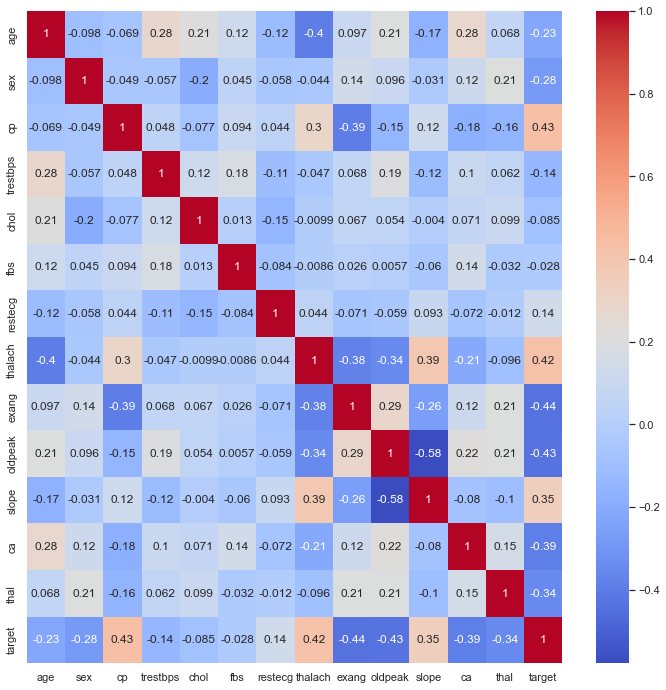

In [22]:
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(data.corr(), annot=True, cmap ='coolwarm')

# Data Pre-processing Engineering

## 1.Deling with null values





From the info function, It seems that there is not any missing values

let's check it ??

In [23]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## 2.Deling with dublicated values

In [32]:
data.duplicated().sum()

1

In [33]:
heart_df = data.drop_duplicates()

In [34]:
heart_df.duplicated().sum()

0

## 3.Deling with outliers

In [35]:
heart_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


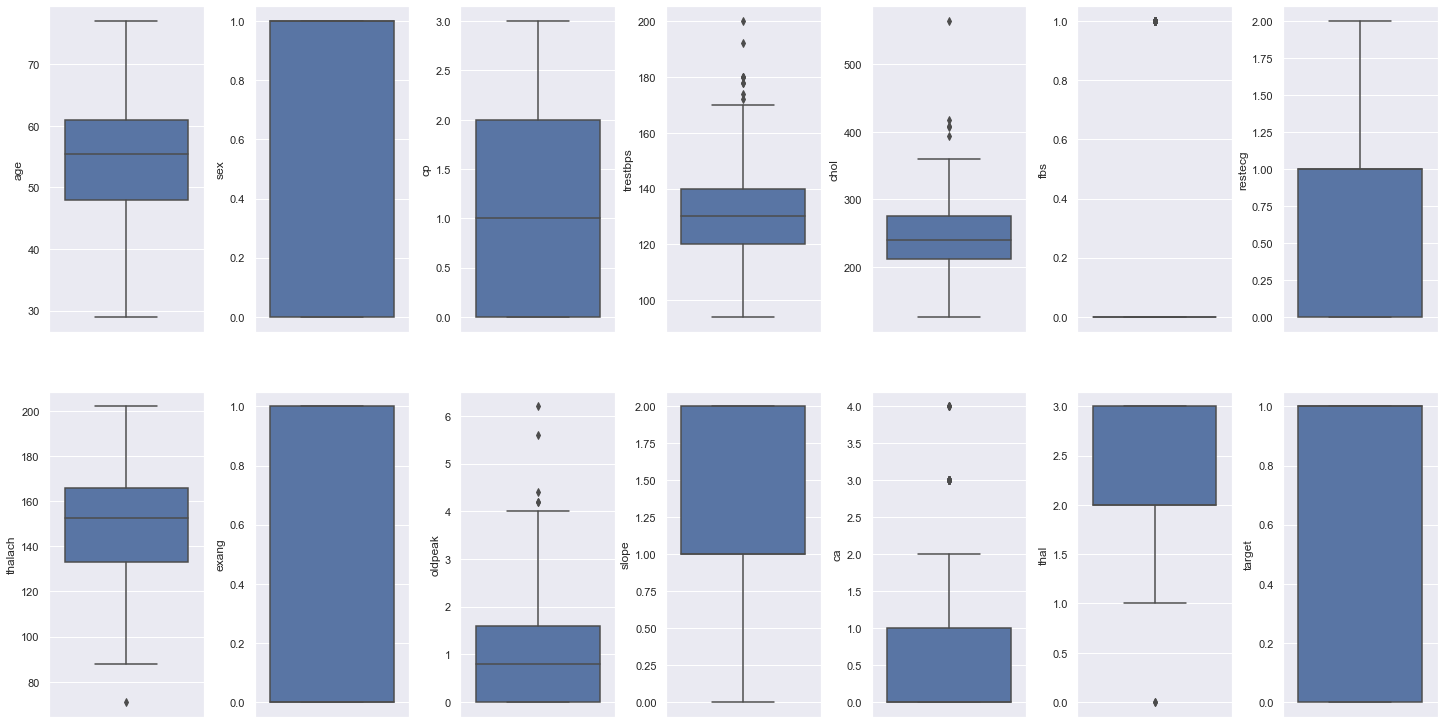

In [36]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in heart_df.items():
    sns.boxplot(y=k, data=heart_df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [52]:
    for k, v in heart_df.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(heart_df)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column age outliers = 0.00%
Column sex outliers = 0.00%
Column cp outliers = 0.00%
Column trestbps outliers = 4.30%
Column chol outliers = 1.66%
Column fbs outliers = 100.00%
Column restecg outliers = 0.00%
Column thalach outliers = 0.33%
Column exang outliers = 0.00%
Column oldpeak outliers = 2.65%
Column slope outliers = 0.00%
Column ca outliers = 7.95%
Column thal outliers = 0.66%
Column target outliers = 0.00%


<AxesSubplot:xlabel='ca', ylabel='Count'>

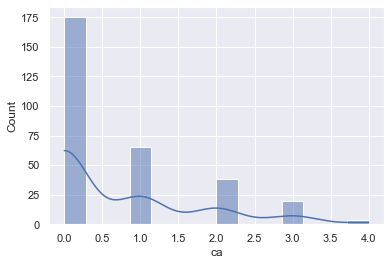

In [53]:
sns.histplot(heart_df["ca"], kde=True)

In [60]:
Q1 = heart_df['ca'].quantile(0.25)
Q3 = heart_df['ca'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * (IQR)
upper = Q3 + 1.5 * (IQR)

print("Upper is :" ,upper)
print("Lower is :" ,lower)

Upper is : 2.5
Lower is : -1.5


In [61]:
cleaned_df = heart_df[heart_df["ca"] <= 3]

<AxesSubplot:xlabel='ca', ylabel='Count'>

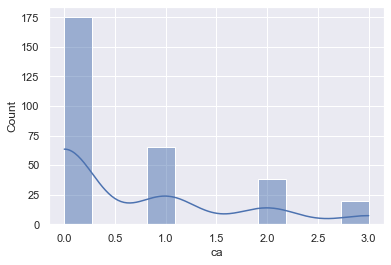

In [62]:
sns.histplot(cleaned_df["ca"], kde=True)

In [65]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       298 non-null    int64  
 1   sex       298 non-null    int64  
 2   cp        298 non-null    int64  
 3   trestbps  298 non-null    int64  
 4   chol      298 non-null    int64  
 5   fbs       298 non-null    int64  
 6   restecg   298 non-null    int64  
 7   thalach   298 non-null    int64  
 8   exang     298 non-null    int64  
 9   oldpeak   298 non-null    float64
 10  slope     298 non-null    int64  
 11  ca        298 non-null    int64  
 12  thal      298 non-null    int64  
 13  target    298 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 43.0 KB


# Visualising Count the target class

<AxesSubplot:xlabel='target', ylabel='count'>

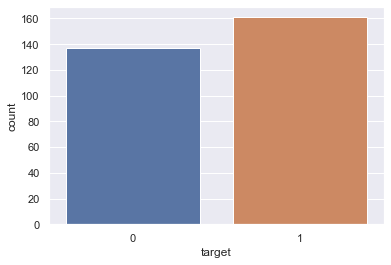

In [66]:
# Count the target class
sns.countplot(x ='target', data =cleaned_df )

# Decleare the Inputs and Target

In [67]:
x = cleaned_df.drop(['target'], axis=1)
y = cleaned_df['target']

# Feature scaling


In [68]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [69]:
scaler.fit(x)
x_scaled = scaler.transform(x)

# Data Splitting

In [70]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2)

# Logistic Regression

In [71]:
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression()


In [72]:
lr_classifier.fit(x_train, y_train)
y_pred= lr_classifier.predict(x_test)
y_pred

array([0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1], dtype=int64)

# Model Evaluation

In [73]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [74]:
accuracy_score(y_test, y_pred)

0.8166666666666667

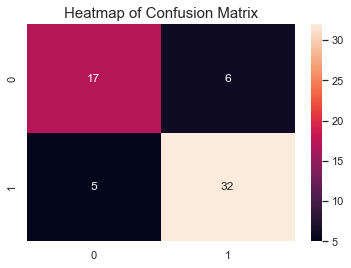

In [75]:
cm = confusion_matrix(y_test, y_pred)
plt.title('Heatmap of Confusion Matrix', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()

# Testing the KNN Algorithm


In [76]:
from sklearn.neighbors import KNeighborsClassifier

In [83]:
k_range = range(1,26)
score = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors= k)
    knn.fit(x_train , y_train)
    y_pred = knn.predict(x_test)
    score=accuracy_score(y_test , y_pred)
    print ("When the number of neighbors =", k,"The Accuracy score =", score)

When the number of neighbors = 1 The Accuracy score = 0.7333333333333333
When the number of neighbors = 2 The Accuracy score = 0.7333333333333333
When the number of neighbors = 3 The Accuracy score = 0.7666666666666667
When the number of neighbors = 4 The Accuracy score = 0.7833333333333333
When the number of neighbors = 5 The Accuracy score = 0.7666666666666667
When the number of neighbors = 6 The Accuracy score = 0.75
When the number of neighbors = 7 The Accuracy score = 0.7666666666666667
When the number of neighbors = 8 The Accuracy score = 0.75
When the number of neighbors = 9 The Accuracy score = 0.7833333333333333
When the number of neighbors = 10 The Accuracy score = 0.75
When the number of neighbors = 11 The Accuracy score = 0.8166666666666667
When the number of neighbors = 12 The Accuracy score = 0.75
When the number of neighbors = 13 The Accuracy score = 0.8166666666666667
When the number of neighbors = 14 The Accuracy score = 0.85
When the number of neighbors = 15 The Accur

Text(0, 0.5, 'testing accuracy')

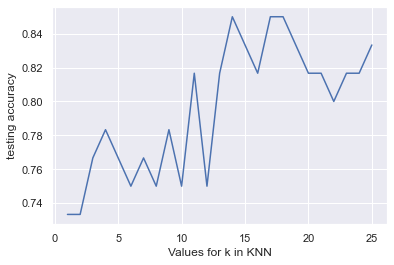

In [86]:
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors= k)
    knn.fit(x_train , y_train)
    y_pred = knn.predict(x_test)
    scores.append(accuracy_score(y_test , y_pred) )

plt.plot(k_range , scores)
plt.xlabel('Values for k in KNN')
plt.ylabel('testing accuracy')